### Approximating the integral

It is easy to see that as we use large $n$ (i.e., more qubits) and thus larger $b_{\mbox{max}}$, we can approximate the integral better as illustrated below. 

In [1]:
import math

b_max = math.pi / 100  # upper limit of integral # 5
nbit = 20  # change this value to get discretized result closer to analytical results # 3

analyticResult = (b_max / 2.0 - math.sin(2 * b_max) / 4.0 ) / b_max  # the target integral can be analytically solved
print("Analytical Result:", analyticResult)

ndiv = 2**nbit  #number of discretization 
discretizedResult = 0.0
for i in range(ndiv):
    discretizedResult += math.sin(b_max / ndiv * (i + 0.5))**2
discretizedResult = discretizedResult / ndiv
print("Discretized Result:", discretizedResult)

Analytical Result: 0.00032892188007938847
Discretized Result: 0.00032892188007927603


### Grover Operators for Amplitude Estimation

We can easily build quantum circuits for fast computation of the Monte Carlo integration as below. Here, we show functions to construct quantum circuits running with simulators. Running them on real devices should be easy by adjusting the parameters of the functions.  

In [2]:
import sys
sys.path.append('../libmitigation')

In [3]:
#Preparing qiskit environment
from qiskit import ClassicalRegister, QuantumRegister, QuantumCircuit
from qiskit import execute
from qiskit import IBMQ
from qiskit import Aer
from scipy import optimize
import sys, time
import mpmath as mp
import numpy as np
import matplotlib.pyplot as plt
import pickle
np.random.seed(42)
seed = 42

/Users/yangbo/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/qiskit/__init__.py:67: DeprecationWarning: Using Qiskit with Python 3.6 is deprecated as of the 0.17.0 release. Support for running Qiskit with Python 3.6 will be removed in a future release.
  DeprecationWarning,


In [4]:
from qiskit.providers.aer.noise import NoiseModel
from qiskit.providers.aer.noise import QuantumError, ReadoutError
from qiskit.providers.aer.noise import depolarizing_error
import qiskit.ignis.mitigation as mit
from qiskit.ignis.mitigation.measurement import tensored_meas_cal, TensoredMeasFitter
from lib_grover import *

In [5]:
import importlib
from inv_sgs import InvSGS
from inv_s_sgs import InvSSGS
from inv_lm_sgs import InvLMSGS
from inv_s_lm_sgs import InvSLMSGS
from inv_s_lm0_sgs import InvSLM0SGS
from inv_s_lmk_sgs import InvSLMkSGS
from mooney_etal import MooneyEtal
from sgs_algorithm import sgs_algorithm
from inv_s_scipy import InvSSciPy
from inv_s_scipy_sgs import InvSSciPySGS

## Testing the algorithm with simulators

Let us run the algorithm with simulators

In [6]:
#setting the number of shots and Grover operators.

# number_grover_list = [0, 1, 2, 4, 8, 16, 32] # , 64, 128, 256]  # list of number of Grover operators
number_grover_list = [5 * i for i in range(20)]
shots_list = [100] * len(number_grover_list) # list of number of shots
if len(shots_list) != len(number_grover_list):
    raise Exception(
        'The length of shots_list should be equal to the length of number_grover_list.'
    )

backend = Aer.get_backend('qasm_simulator')

In [7]:
noise_model = NoiseModel()
for qi in range(nbit+1):
    if qi >= 0:
        read_err = ReadoutError([[0.990, 0.010],[0.010,0.990]])
        noise_model.add_readout_error(read_err, [qi])

Finally, we can run the algorithm as below: 

In [8]:
qc_list = create_grover_circuit(number_grover_list, nbit,b_max)  # list of Grover circuits

In [9]:
t1 = time.time()
counts_lists = []
max_iter = 100
for i in range(max_iter):
    counts_list = run_grover(qc_list, number_grover_list, shots_list, backend, noise_model=noise_model, seed_transpiler=seed, seed_simulator=seed)  # list of number of grover operators
    counts_lists.append(counts_list)
    with open("p001_q001_piover100.pkl", "wb") as f:
        pickle.dump(counts_lists, f)
    print("iter", i, "finished")
t2 = time.time()
print(t2-t1)

0 th round with 0 oracles
0.08110785484313965 s
1 th round with 5 oracles
1.1835458278656006 s
2 th round with 10 oracles
2.286431074142456 s
3 th round with 15 oracles
3.5803749561309814 s
4 th round with 20 oracles
4.545196056365967 s
5 th round with 25 oracles
5.9547789096832275 s
6 th round with 30 oracles
7.326803922653198 s
7 th round with 35 oracles
8.78570818901062 s
8 th round with 40 oracles
9.936781883239746 s
9 th round with 45 oracles
10.21359896659851 s
10 th round with 50 oracles
11.577783107757568 s
11 th round with 55 oracles
12.829893827438354 s
12 th round with 60 oracles
15.393671989440918 s
13 th round with 65 oracles
18.13134002685547 s
14 th round with 70 oracles
21.964993000030518 s
15 th round with 75 oracles
21.956056833267212 s
16 th round with 80 oracles
29.00603985786438 s
17 th round with 85 oracles
28.7378990650177 s
18 th round with 90 oracles
30.72044014930725 s
19 th round with 95 oracles
31.808599710464478 s
iter 0 finished
0 th round with 0 oracles
0

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/Users/yangbo/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 3343, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-9-4d9b587920fb>", line 5, in <module>
    counts_list = run_grover(qc_list, number_grover_list, shots_list, backend, noise_model=noise_model, seed_transpiler=seed, seed_simulator=seed)  # list of number of grover operators
  File "../libmitigation/lib_grover.py", line 152, in run_grover
    time.sleep(interval)
KeyboardInterrupt

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/yangbo/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2044, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'KeyboardInterrupt' object has no attribute '_render_traceback_'

During handling of the above exception, another 

TypeError: object of type 'NoneType' has no len()

In [8]:
import pickle
with open("raw_result_20_001_001.pkl", "rb")as f:
    counts_list = pickle.load(f)

In [9]:
hit_list = make_hit_list(counts_list)
print(hit_list)

[77, 84, 77, 80, 78, 78, 73, 72, 71, 63, 76, 68, 65, 66, 67, 56, 53, 48, 47, 47, 46, 43, 37, 40, 34, 35, 27, 26, 13, 21, 19, 17, 7, 12, 10, 8, 7, 6, 5, 4, 0, 3, 1, 0, 0, 1, 0, 4, 6, 4, 7, 10, 8, 17, 13, 13, 14, 14, 33, 32, 16, 24, 24, 40, 39, 49, 36, 46, 52, 54, 51, 56, 64, 64, 63, 72, 67, 78, 70, 68, 73, 79, 76, 83, 69, 81, 81, 79, 81, 83, 82, 79, 73, 73, 76, 68, 75, 70, 67, 61]


In [10]:
shots = 8192
qr = QuantumRegister(nbit+1)
mit_pattern = [[i] for i in range(nbit+1)]
meas_calibs, state_labels = tensored_meas_cal(mit_pattern=mit_pattern, qr=qr, circlabel='mcal')
job = execute(meas_calibs, backend=Aer.get_backend('qasm_simulator'), shots=shots, noise_model=noise_model)
cal_results = job.result()
meas_fitter = TensoredMeasFitter(cal_results, mit_pattern=mit_pattern)

In [11]:
ts_lm0_sgs = []
meas_filter = InvSLM0SGS(nbit+1, meas_fitter.cal_matrices, mit_pattern)
x_tilde_S_lm_0_list = []
for counts in counts_list:
    t1 = time.time()
    x_tilde = meas_filter.apply(counts)
    t2 = time.time()
    ts_lm0_sgs.append(t2 - t1)
    x_tilde_S_lm_0_list.append(x_tilde)
mit_hit_S_lm_0_list = make_hit_list(x_tilde_S_lm_0_list)
print(mit_hit_S_lm_0_list)

Restriction to labels of y + Lagrange Multiplier + SGS algorithm
sum of mitigated probability vector x_s: 1.0877454504783406
sum of mitigated probability vector x_hat_s: 1.0877454018835366
0.020740032196044922 s
number of positive values:  18
main process: Done!
Restriction to labels of y + Lagrange Multiplier + SGS algorithm
sum of mitigated probability vector x_s: 1.136493212021113
sum of mitigated probability vector x_hat_s: 1.1364931832347513
0.008337974548339844 s
number of positive values:  11
main process: Done!
Restriction to labels of y + Lagrange Multiplier + SGS algorithm
sum of mitigated probability vector x_s: 1.1047080368699247
sum of mitigated probability vector x_hat_s: 1.10470799093545
0.017084836959838867 s
number of positive values:  17
main process: Done!
Restriction to labels of y + Lagrange Multiplier + SGS algorithm
sum of mitigated probability vector x_s: 1.1117944361891072
sum of mitigated probability vector x_hat_s: 1.1117943920573554
0.018339872360229492 s
nu

sum of mitigated probability vector x_s: 1.1561235914628403
sum of mitigated probability vector x_hat_s: 1.1561235677013406
0.04911398887634277 s
number of positive values:  25
main process: Done!
Restriction to labels of y + Lagrange Multiplier + SGS algorithm
sum of mitigated probability vector x_s: 1.1445613278022626
sum of mitigated probability vector x_hat_s: 1.1445613115623
0.022639036178588867 s
number of positive values:  17
main process: Done!
Restriction to labels of y + Lagrange Multiplier + SGS algorithm
sum of mitigated probability vector x_s: 1.149667407292897
sum of mitigated probability vector x_hat_s: 1.1496673934275463
0.025580167770385742 s
number of positive values:  18
main process: Done!
Restriction to labels of y + Lagrange Multiplier + SGS algorithm
sum of mitigated probability vector x_s: 1.1433916571330334
sum of mitigated probability vector x_hat_s: 1.1433916431784583
0.030161142349243164 s
number of positive values:  18
main process: Done!
Restriction to lab

sum of mitigated probability vector x_s: 1.131670496237853
sum of mitigated probability vector x_hat_s: 1.1316704463301954
0.0344390869140625 s
number of positive values:  24
main process: Done!
Restriction to labels of y + Lagrange Multiplier + SGS algorithm
sum of mitigated probability vector x_s: 1.1435423031133585
sum of mitigated probability vector x_hat_s: 1.1435422614777042
0.0215451717376709 s
number of positive values:  19
main process: Done!
Restriction to labels of y + Lagrange Multiplier + SGS algorithm
sum of mitigated probability vector x_s: 1.132518304852089
sum of mitigated probability vector x_hat_s: 1.1325182718761546
0.014792919158935547 s
number of positive values:  15
main process: Done!
Restriction to labels of y + Lagrange Multiplier + SGS algorithm
sum of mitigated probability vector x_s: 1.1341139168984815
sum of mitigated probability vector x_hat_s: 1.134113873904199
0.020559072494506836 s
number of positive values:  18
main process: Done!
Restriction to label

In [12]:
ts_mooney100 = []
meas_filter = MooneyEtal(nbit+1, meas_fitter.cal_matrices, mit_pattern)
x_tilde_mooney_list = []
for counts in counts_list:
    t1 = time.time()
    x_tilde = meas_filter.apply(counts, threshold=1/100)
    t2 = time.time()
    ts_mooney100.append(t2 - t1)
    x_tilde_mooney_list.append(x_tilde)
mit_hit_mooney100_list = make_hit_list(x_tilde_mooney_list)
print(mit_hit_mooney100_list)

The heuristcs by Mooney et al. + SGS algorithm
{65536: 0.01703654088051979, 524296: 0.012047829042963146, 64: 0.01726171072517918, 4: 0.01677183881605302, 16: 0.013403133085923962, 0: 0.9492985236171663, 16384: 0.013435724595882851, 524288: 0.01248938000450263, 3072: 0.012238024604021562}
sum of counts: 1.0639827053722124
0.0028951168060302734 s
number of positive values:  9
main process: Done!
The heuristcs by Mooney et al. + SGS algorithm
{4096: 0.026326932217254843, 262144: 0.015166844890926933, 65536: 0.01632672761633857, 16: 0.012376042314380255, 512: 0.014876085183381451, 0: 1.036419317068719}
sum of counts: 1.1214919492910012
0.001940011978149414 s
number of positive values:  6
main process: Done!
The heuristcs by Mooney et al. + SGS algorithm
{128: 0.01390644027654591, 1: 0.014832330859368918, 4: 0.029143737699794003, 33280: 0.012141154387838825, 262144: 0.01597192643321497, 131072: 0.01678551776033464, 131136: 0.012196622561286974, 32768: 0.015380134864150461, 0: 0.94941678354

sum of counts: 1.073401888809893
0.004458189010620117 s
number of positive values:  10
main process: Done!
The heuristcs by Mooney et al. + SGS algorithm
{1638400: 0.011662752258968857, 32: 0.017184537290654098, 32768: 0.018332825965838483, 0: 0.6636767481794055, 12: 0.012251757735356424, 1048576: 0.25128670210622467, 1572864: 0.08299835294160665}
sum of counts: 1.0573936764780547
0.0025169849395751953 s
number of positive values:  7
main process: Done!
The heuristcs by Mooney et al. + SGS algorithm
{1310720: 0.010013785238006431, 2052: 0.012266880935541803, 4097: 0.01214585583585983, 256: 0.018269293206435597, 128: 0.01755171551467894, 8: 0.02996510240532378, 1024: 0.03125144844759671, 0: 0.6257835129675201, 1572864: 0.07124242528108128, 1048576: 0.21508389080905702, 262144: 0.031221562985180508, 1179648: 0.010539239520555362, 1: 0.018030716108139926}
sum of counts: 1.1033654292549773
0.0030188560485839844 s
number of positive values:  13
main process: Done!
The heuristcs by Mooney et

In [13]:
ts_mooney10 = []
meas_filter = MooneyEtal(nbit+1, meas_fitter.cal_matrices, mit_pattern)
x_tilde_mooney_list = []
for counts in counts_list:
    t1 = time.time()
    x_tilde = meas_filter.apply(counts, threshold=1/10)
    t2 = time.time()
    ts_mooney10.append(t2 - t1)
    x_tilde_mooney_list.append(x_tilde)
mit_hit_mooney10_list = make_hit_list(x_tilde_mooney_list)
print(mit_hit_mooney10_list)

The heuristcs by Mooney et al. + SGS algorithm
{0: 0.9517158705291403}
sum of counts: 0.9517158705291403
0.0005481243133544922 s
number of positive values:  1
accumulator is positive, we might even ignoring the necessal positive values.
main process: Done!
The heuristcs by Mooney et al. + SGS algorithm
{0: 1.0382449012339605}
sum of counts: 1.0382449012339605
0.0016131401062011719 s
number of positive values:  1
main process: Done!
The heuristcs by Mooney et al. + SGS algorithm
{0: 0.9516124033052549}
sum of counts: 0.9516124033052549
0.0013668537139892578 s
number of positive values:  1
accumulator is positive, we might even ignoring the necessal positive values.
main process: Done!
The heuristcs by Mooney et al. + SGS algorithm
{0: 0.988799740831206}
sum of counts: 0.988799740831206
0.00113677978515625 s
number of positive values:  1
accumulator is positive, we might even ignoring the necessal positive values.
main process: Done!
The heuristcs by Mooney et al. + SGS algorithm
{0: 0.9

0.0009629726409912109 s
number of positive values:  2
accumulator is positive, we might even ignoring the necessal positive values.
main process: Done!
The heuristcs by Mooney et al. + SGS algorithm
{1048576: 0.5281585039580282, 1572864: 0.16606528314533475, 0: 0.14291566396853117}
sum of counts: 0.8371394510718941
0.000885009765625 s
number of positive values:  3
accumulator is positive, we might even ignoring the necessal positive values.
main process: Done!
The heuristcs by Mooney et al. + SGS algorithm
{1048576: 0.6766401743419979, 0: 0.11667619538412956, 1572864: 0.1765235421392807}
sum of counts: 0.9698399118654081
0.0007710456848144531 s
number of positive values:  3
accumulator is positive, we might even ignoring the necessal positive values.
main process: Done!
The heuristcs by Mooney et al. + SGS algorithm
{1048576: 0.690205415396166, 1572864: 0.18870953949443753}
sum of counts: 0.8789149548906035
0.0011861324310302734 s
number of positive values:  2
accumulator is positive, 

{0: 0.8900128872495827}
sum of counts: 0.8900128872495827
0.001708984375 s
number of positive values:  1
accumulator is positive, we might even ignoring the necessal positive values.
main process: Done!
The heuristcs by Mooney et al. + SGS algorithm
{0: 0.8282064367461394}
sum of counts: 0.8282064367461394
0.0004448890686035156 s
number of positive values:  1
accumulator is positive, we might even ignoring the necessal positive values.
main process: Done!
The heuristcs by Mooney et al. + SGS algorithm
{0: 0.9641806278537146}
sum of counts: 0.9641806278537146
0.0003669261932373047 s
number of positive values:  1
accumulator is positive, we might even ignoring the necessal positive values.
main process: Done!
The heuristcs by Mooney et al. + SGS algorithm
{0: 0.8651868398243197}
sum of counts: 0.8651868398243197
0.0004851818084716797 s
number of positive values:  1
accumulator is positive, we might even ignoring the necessal positive values.
main process: Done!
The heuristcs by Mooney et

In [14]:
ts_scipy = []
meas_filter = InvSSciPy(nbit+1, meas_fitter.cal_matrices, mit_pattern)
x_tilde_S_SciPy_list = []
for counts in counts_list:
    t1 = time.time()
    x_tilde = meas_filter.apply(counts)
    t2 = time.time()
    ts_scipy.append(t2 - t1)
    x_tilde_S_SciPy_list.append(x_tilde)
mit_hit_S_SciPy_list = make_hit_list(x_tilde_S_SciPy_list)
print(mit_hit_S_SciPy_list)

Restriction to labels of y + whole SciPy optimization
sum of mitigated probability vector x_s: 1.0877454504783406
sum of mitigated probability vector x_tilde: 1.0
main process: Done!
Restriction to labels of y + whole SciPy optimization
sum of mitigated probability vector x_s: 1.136493212021113
sum of mitigated probability vector x_tilde: 1.0000000000000004
main process: Done!
Restriction to labels of y + whole SciPy optimization
sum of mitigated probability vector x_s: 1.1047080368699247
sum of mitigated probability vector x_tilde: 0.9999999999999999
main process: Done!
Restriction to labels of y + whole SciPy optimization
sum of mitigated probability vector x_s: 1.1117944361891072
sum of mitigated probability vector x_tilde: 0.9999999999999999
main process: Done!
Restriction to labels of y + whole SciPy optimization
sum of mitigated probability vector x_s: 1.1314562266615749
sum of mitigated probability vector x_tilde: 1.0
main process: Done!
Restriction to labels of y + whole SciPy 

sum of mitigated probability vector x_s: 1.1670459433166835
sum of mitigated probability vector x_tilde: 1.0
main process: Done!
Restriction to labels of y + whole SciPy optimization
sum of mitigated probability vector x_s: 1.1479257848246915
sum of mitigated probability vector x_tilde: 1.0
main process: Done!
Restriction to labels of y + whole SciPy optimization
sum of mitigated probability vector x_s: 1.1501664597860117
sum of mitigated probability vector x_tilde: 1.0
main process: Done!
Restriction to labels of y + whole SciPy optimization
sum of mitigated probability vector x_s: 1.13382531223659
sum of mitigated probability vector x_tilde: 1.0
main process: Done!
Restriction to labels of y + whole SciPy optimization
sum of mitigated probability vector x_s: 1.1289888944678006
sum of mitigated probability vector x_tilde: 1.0000000000000002
main process: Done!
Restriction to labels of y + whole SciPy optimization
sum of mitigated probability vector x_s: 1.134040434771898
sum of mitiga

sum of mitigated probability vector x_tilde: 1.0000000000000002
main process: Done!
Restriction to labels of y + whole SciPy optimization
sum of mitigated probability vector x_s: 1.1307138129400616
sum of mitigated probability vector x_tilde: 1.0000000000000002
main process: Done!
Restriction to labels of y + whole SciPy optimization
sum of mitigated probability vector x_s: 1.1272550509074837
sum of mitigated probability vector x_tilde: 0.9999999999999998
main process: Done!
Restriction to labels of y + whole SciPy optimization
sum of mitigated probability vector x_s: 1.1166472533503158
sum of mitigated probability vector x_tilde: 1.0000000000000002
main process: Done!
Restriction to labels of y + whole SciPy optimization
sum of mitigated probability vector x_s: 1.1292499513683163
sum of mitigated probability vector x_tilde: 1.0
main process: Done!
Restriction to labels of y + whole SciPy optimization
sum of mitigated probability vector x_s: 1.1223655586326498
sum of mitigated probabil

In [15]:
ts_scipy_sgs = []
meas_filter = InvSSciPySGS(nbit+1, meas_fitter.cal_matrices, mit_pattern)
x_tilde_S_SciPy_SGS_list = []
for counts in counts_list:
    t1 = time.time()
    x_tilde = meas_filter.apply(counts)
    t2 = time.time()
    ts_scipy_sgs.append(t2 - t1)
    x_tilde_S_SciPy_SGS_list.append(x_tilde)
mit_hit_S_SciPy_SGS_list = make_hit_list(x_tilde_S_SciPy_SGS_list)
print(mit_hit_S_SciPy_SGS_list)

Restriction to labels of y + SciPy optimization + SGS algorithm
sum of mitigated probability vector x_s: 1.0877454504783406
sum of mitigated probability vector x_tilde: 1.0000000000000009
number of positive values:  9
main process: Done!
Restriction to labels of y + SciPy optimization + SGS algorithm
sum of mitigated probability vector x_s: 1.136493212021113
sum of mitigated probability vector x_tilde: 1.0000000000000002
number of positive values:  5
main process: Done!
Restriction to labels of y + SciPy optimization + SGS algorithm
sum of mitigated probability vector x_s: 1.1047080368699247
sum of mitigated probability vector x_tilde: 1.0000000000000002
number of positive values:  10
main process: Done!
Restriction to labels of y + SciPy optimization + SGS algorithm
sum of mitigated probability vector x_s: 1.1117944361891072
sum of mitigated probability vector x_tilde: 0.9999999999999999
number of positive values:  8
main process: Done!
Restriction to labels of y + SciPy optimization 

sum of mitigated probability vector x_s: 1.149667407292897
sum of mitigated probability vector x_tilde: 0.9999999999999994
number of positive values:  13
main process: Done!
Restriction to labels of y + SciPy optimization + SGS algorithm
sum of mitigated probability vector x_s: 1.1433916571330334
sum of mitigated probability vector x_tilde: 0.9999999999999999
number of positive values:  12
main process: Done!
Restriction to labels of y + SciPy optimization + SGS algorithm
sum of mitigated probability vector x_s: 1.1458883454489883
sum of mitigated probability vector x_tilde: 0.9999999999999998
number of positive values:  12
main process: Done!
Restriction to labels of y + SciPy optimization + SGS algorithm
sum of mitigated probability vector x_s: 1.158966034360249
sum of mitigated probability vector x_tilde: 1.0000000000000002
number of positive values:  16
main process: Done!
Restriction to labels of y + SciPy optimization + SGS algorithm
sum of mitigated probability vector x_s: 1.142

sum of mitigated probability vector x_s: 1.131670496237853
sum of mitigated probability vector x_tilde: 1.0000000000000004
number of positive values:  18
main process: Done!
Restriction to labels of y + SciPy optimization + SGS algorithm
sum of mitigated probability vector x_s: 1.1435423031133585
sum of mitigated probability vector x_tilde: 0.9999999999999992
number of positive values:  12
main process: Done!
Restriction to labels of y + SciPy optimization + SGS algorithm
sum of mitigated probability vector x_s: 1.132518304852089
sum of mitigated probability vector x_tilde: 0.9999999999999997
number of positive values:  6
main process: Done!
Restriction to labels of y + SciPy optimization + SGS algorithm
sum of mitigated probability vector x_s: 1.1341139168984815
sum of mitigated probability vector x_tilde: 1.0000000000000002
number of positive values:  11
main process: Done!
Restriction to labels of y + SciPy optimization + SGS algorithm
sum of mitigated probability vector x_s: 1.1471

In [19]:
import pickle
with open("hit_list_20_001_001.pkl", "wb") as f:
    pickle.dump(hit_list, f)

In [13]:
import pickle
with open("mit_hit_S_lm_0_list_20_001_001.pkl", "wb") as f:
    pickle.dump(mit_hit_S_lm_0_list, f)

In [14]:
import pickle
with open("mit_hit_mooney100_list_20_001_001.pkl", "wb") as f:
    pickle.dump(mit_hit_mooney_list, f)

In [ ]:
with open("hit_list_20_001_001.pkl", "rb") as f:
    hit_list = pickle.load(f)
with open("mit_hit_S_lm_0_list_20_001_001.pkl", "rb") as f:
    mit_hit_S_lm_0_list = pickle.load(f)
with open("mit_hit_mooney100_list_20_001_001.pkl", "rb") as f:
    mit_hit_mooney_list = pickle.load(f)

NameError: name 'hit_list' is not defined

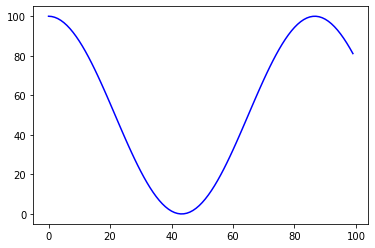

In [10]:
divide = 100
number_grover_list = [i for i in range(100)]
plt.plot(np.linspace(0,number_grover_list[-1], divide), 100 * np.cos(2 * np.linspace(0,number_grover_list[-1], divide) * np.arccos(np.sqrt(discretizedResult))) ** 2, label="theoretical curve", color="blue")
plt.plot(number_grover_list, hit_list, marker="o", label="results with readout error", color="green")
plt.plot(number_grover_list, mit_hit_S_lm_0_list, marker="v", label="mitigated results (+S +LM0)", color="purple")
plt.plot(number_grover_list, mit_hit_mooney_list, marker="*", label="mitigated results (Mooney et al.)", color="red")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=18)
plt.title("20qubit, p(0->1): 0.01, p(1->0): 0.01")
plt.xlabel("number of grover iterations $m$")
plt.ylabel("number of shots for $|00...0>$")

In [16]:
sin_hit_list = [100 - h for h in hit_list]
sin_mit_hit_S_lm_0_list = [100 - h for h in mit_hit_S_lm_0_list]
sin_mit_hit_mooney100_list = [100 - h for h in mit_hit_mooney100_list]
sin_mit_hit_mooney10_list = [100 - h for h in mit_hit_mooney10_list]
sin_mit_hit_S_SciPy_list = [100 - h for h in mit_hit_S_SciPy_list]
sin_mit_hit_S_SciPy_SGS_list = [100 - h for h in mit_hit_S_SciPy_SGS_list]

thetaCandidate_list = calculate_theta(
    sin_hit_list, number_grover_list, shots_list)  # list of estimated theta values
thetaCandidate_mit_S_lm_0_list = calculate_theta(
    sin_mit_hit_S_lm_0_list, number_grover_list, shots_list)  # list of estimated theta values
thetaCandidate_mit_mooney100_list = calculate_theta(
    sin_mit_hit_mooney100_list, number_grover_list, shots_list)  # list of estimated theta values
thetaCandidate_mit_mooney10_list = calculate_theta(
    sin_mit_hit_mooney10_list, number_grover_list, shots_list)  # list of estimated theta values
thetaCandidate_mit_S_SciPy_list = calculate_theta(
    sin_mit_hit_S_SciPy_list, number_grover_list, shots_list)  # list of estimated theta values
thetaCandidate_mit_S_SciPy_SGS_list = calculate_theta(
    sin_mit_hit_S_SciPy_SGS_list, number_grover_list, shots_list)  # list of estimated theta values

error_list = np.abs(np.sin(thetaCandidate_list)**2 - discretizedResult)  # list of estimation errors
error_mit_S_lm_0_list = np.abs(np.sin(thetaCandidate_mit_S_lm_0_list)**2 - discretizedResult)  # list of estimation errors
error_mit_mooney100_list = np.abs(np.sin(thetaCandidate_mit_mooney100_list)**2 - discretizedResult)  # list of estimation errors
error_mit_mooney10_list = np.abs(np.sin(thetaCandidate_mit_mooney10_list)**2 - discretizedResult)  # list of estimation errors
error_mit_S_SciPy_list = np.abs(np.sin(thetaCandidate_mit_S_SciPy_list)**2 - discretizedResult)  # list of estimation errors
error_mit_S_SciPy_SGS_list = np.abs(np.sin(thetaCandidate_mit_S_SciPy_SGS_list)**2 - discretizedResult)  # list of estimation errors
OracleCall_list = []  # list of number of oracle calls
ErrorCramérRao_list = []  # list of Cramér-Rao lower bound
for i in range(len(number_grover_list)):
    OracleCall_list.append(
        CalcNumberOracleCalls(i, shots_list, number_grover_list))
    ErrorCramérRao_list.append(
        CalcErrorCramérRao(i, shots_list, discretizedResult, number_grover_list))

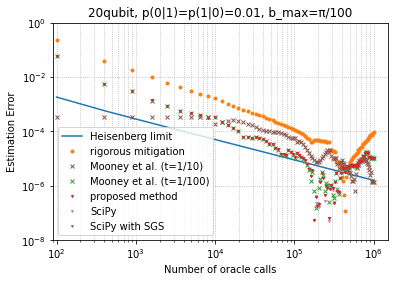

In [22]:
plt.clf()
p = plt.loglog( OracleCall_list, ErrorCramérRao_list)
p0 = plt.loglog( OracleCall_list, error_list, 'o', markersize=3)
p2 = plt.loglog( OracleCall_list, error_mit_mooney100_list, 'x', color='C2', markersize=4)
p4 = plt.loglog( OracleCall_list, error_mit_mooney10_list, 'x', color='C5', markersize=4)
p5 = plt.loglog( OracleCall_list, error_mit_S_SciPy_list, 'v', color='C6', markersize=2)
p6 = plt.loglog( OracleCall_list, error_mit_S_SciPy_SGS_list, 'v', color='C7', markersize=2)
p3 = plt.loglog( OracleCall_list, error_mit_S_lm_0_list, 'v', color='C3', markersize=2)

plt.title("20qubit, p(0|1)=p(1|0)=0.01, b_max=π/100")
plt.xlim(OracleCall_list[0]*0.9, OracleCall_list[-1]*1.5)
plt.xlabel("Number of oracle calls")
plt.ylim(0.00000001, 1)
plt.ylabel("Estimation Error")
plt.grid(True, which="both", ls="dotted")
plt.legend((p[0], p0[0], p4[0], p2[0], p3[0], p5[0], p6[0]), 
           ("Heisenberg limit", "rigorous mitigation", "Mooney et al. (t=1/10)", "Mooney et al. (t=1/100)", "proposed method", "SciPy", "SciPy with SGS"))
plt.show()

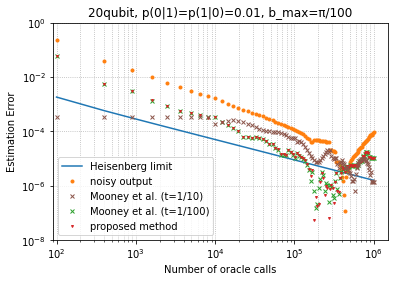

In [17]:
plt.clf()
p = plt.loglog( OracleCall_list, ErrorCramérRao_list)
p0 = plt.loglog( OracleCall_list, error_list, 'o', markersize=3)
p2 = plt.loglog( OracleCall_list, error_mit_mooney100_list, 'x', color='C2', markersize=4)
p3 = plt.loglog( OracleCall_list, error_mit_S_lm_0_list, 'v', color='C3', markersize=2)
p4 = plt.loglog( OracleCall_list, error_mit_mooney10_list, 'x', color='C5', markersize=4)

plt.title("20qubit, p(0|1)=p(1|0)=0.01, b_max=π/100")
plt.xlim(OracleCall_list[0]*0.9, OracleCall_list[-1]*1.5)
plt.xlabel("Number of oracle calls")
plt.ylim(0.00000001, 1)
plt.ylabel("Estimation Error")
plt.grid(True, which="both", ls="dotted")
plt.legend((p[0], p0[0], p4[0], p2[0], p3[0]), ("Heisenberg limit", "noisy output", "Mooney et al. (t=1/10)", "Mooney et al. (t=1/100)", "proposed method"))
plt.show()

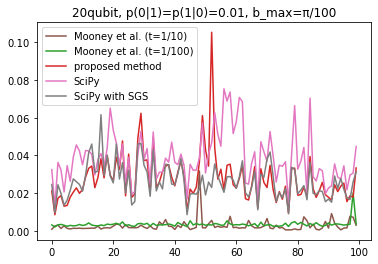

In [23]:
plt.clf()
p4 = plt.plot(ts_mooney10, color="C5")
p2 = plt.plot(ts_mooney100, color="C2")
p3 = plt.plot(ts_lm0_sgs, color="C3")
p5 = plt.plot(ts_scipy, color="C6")
p6 = plt.plot(ts_scipy_sgs, color="C7")
plt.title("20qubit, p(0|1)=p(1|0)=0.01, b_max=π/100")
plt.legend((p4[0], p2[0], p3[0], p5[0], p6[0]),
           ("Mooney et al. (t=1/10)", "Mooney et al. (t=1/100)", "proposed method", "SciPy", "SciPy with SGS"))
plt.show()

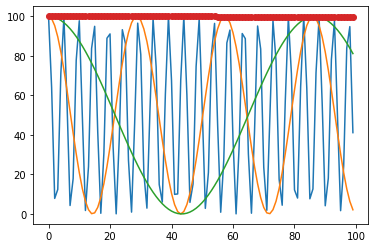

In [35]:
divide = 100
dr = 0.1
plt.plot(np.linspace(0,number_grover_list[-1], divide), 
         divide * np.cos(2 * np.linspace(0,number_grover_list[-1], divide) * np.arccos(np.sqrt(dr))) ** 2
        )
plt.plot(np.linspace(0,number_grover_list[-1], divide), 
         divide * np.cos(2 * np.linspace(0,number_grover_list[-1], divide) * np.arccos(np.sqrt(0.003))) ** 2
        )
plt.plot(np.linspace(0,number_grover_list[-1], divide), 
         divide * np.cos(2 * np.linspace(0,number_grover_list[-1], divide) * np.arccos(np.sqrt(discretizedResult))) ** 2
        )
plt.plot(np.linspace(0,number_grover_list[-1], divide), 
         divide * np.cos(2 * np.linspace(0,number_grover_list[-1], divide) * np.arccos(discretizedResult)) ** 2, 
         marker="o")